In [14]:
import pandas as pd
factories = pd.read_csv('tbl_factory.csv', index_col=0)
factories

,FCName,FCDemand,FCRegion
FCID,,,
FC00001,東京工場,28,関東
FC00002,木更津工場,29,関東
FC00003,多摩工場,31,関東
FC00004,横須賀工場,25,関東
FC00005,仙台工場,21,東北
FC00006,山形工場,30,東北
FC00007,那須工場,25,東北
FC00008,青森工場,16,東北


In [15]:
warehouses = pd.read_csv('tbl_warehouse.csv', index_col=0)
warehouses

,WHName,WHSupply,WHRegion
WHID,,,
WH00001,杉並倉庫,35,関東
WH00002,品川倉庫,41,関東
WH00003,豊洲倉庫,42,関東
WH00004,郡山倉庫,60,東北
WH00005,仙台倉庫,72,東北
WH00006,山形倉庫,65,東北


In [16]:
cost = pd.read_csv('rel_cost.csv',index_col=0)
cost.head()

,FCID,WHID,Cost
RCostID,,,
1,FC00001,WH00001,0.4
2,FC00001,WH00002,0.8
3,FC00001,WH00003,1.5
4,FC00002,WH00001,0.9
5,FC00002,WH00002,0.8


In [17]:
trans = pd.read_csv('tbl_transaction.csv',index_col=0)
trans.head()

,TransactionDate,ToFC,FromWH,Quantity
TRID,,,,
0,2019-01-01 02:11:10,FC00004,WH00003,33
1,2019-01-01 06:12:42,FC00007,WH00006,19
2,2019-01-01 06:32:32,FC00006,WH00004,31
3,2019-01-01 07:17:06,FC00002,WH00003,18
4,2019-01-01 07:52:18,FC00001,WH00002,30


In [18]:
join_data = pd.merge(trans,cost,left_on=['ToFC','FromWH'],right_on=['FCID','WHID'],how='left')
join_data.head()

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9
3,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6
4,2019-01-01 07:52:18,FC00001,WH00002,30,FC00001,WH00002,0.8


In [19]:
join_data= pd.merge(join_data,factories,on='FCID',how='left')
join_data.head()

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost,FCName,FCDemand,FCRegion
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1,横須賀工場,25,関東
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3,那須工場,25,東北
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9,山形工場,30,東北
3,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6,木更津工場,29,関東
4,2019-01-01 07:52:18,FC00001,WH00002,30,FC00001,WH00002,0.8,東京工場,28,関東


In [20]:
join_data=pd.merge(join_data,warehouses,on='WHID',how='left')

In [21]:
join_data

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost,FCName,FCDemand,FCRegion,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1,横須賀工場,25,関東,豊洲倉庫,42,関東
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3,那須工場,25,東北,山形倉庫,65,東北
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9,山形工場,30,東北,郡山倉庫,60,東北
3,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6,木更津工場,29,関東,豊洲倉庫,42,関東
4,2019-01-01 07:52:18,FC00001,WH00002,30,FC00001,WH00002,0.8,東京工場,28,関東,品川倉庫,41,関東
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2019-12-31 11:27:51,FC00007,WH00006,29,FC00007,WH00006,1.3,那須工場,25,東北,山形倉庫,65,東北
3996,2019-12-31 17:10:21,FC00002,WH00003,35,FC00002,WH00003,1.6,木更津工場,29,関東,豊洲倉庫,42,関東
3997,2019-12-31 19:35:07,FC00003,WH00001,36,FC00003,WH00001,1.2,多摩工場,31,関東,杉並倉庫,35,関東
3998,2019-12-31 21:45:07,FC00005,WH00005,34,FC00005,WH00005,0.3,仙台工場,21,東北,仙台倉庫,72,東北


In [22]:
join_data=join_data[['TransactionDate','Quantity','Cost','ToFC','FCName','FCDemand','FromWH','WHName','WHSupply','WHRegion']]
join_data.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,33,1.1,FC00004,横須賀工場,25,WH00003,豊洲倉庫,42,関東
1,2019-01-01 06:12:42,19,1.3,FC00007,那須工場,25,WH00006,山形倉庫,65,東北
2,2019-01-01 06:32:32,31,0.9,FC00006,山形工場,30,WH00004,郡山倉庫,60,東北
3,2019-01-01 07:17:06,18,1.6,FC00002,木更津工場,29,WH00003,豊洲倉庫,42,関東
4,2019-01-01 07:52:18,30,0.8,FC00001,東京工場,28,WH00002,品川倉庫,41,関東


In [23]:
kanto = join_data.loc[join_data['WHRegion']=='関東']
kanto.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,33,1.1,FC00004,横須賀工場,25,WH00003,豊洲倉庫,42,関東
3,2019-01-01 07:17:06,18,1.6,FC00002,木更津工場,29,WH00003,豊洲倉庫,42,関東
4,2019-01-01 07:52:18,30,0.8,FC00001,東京工場,28,WH00002,品川倉庫,41,関東
7,2019-01-01 09:09:30,12,1.5,FC00001,東京工場,28,WH00003,豊洲倉庫,42,関東
8,2019-01-01 10:52:55,27,1.5,FC00003,多摩工場,31,WH00003,豊洲倉庫,42,関東


In [24]:
tohoku=join_data.loc[join_data['WHRegion']=='東北']
tohoku.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
1,2019-01-01 06:12:42,19,1.3,FC00007,那須工場,25,WH00006,山形倉庫,65,東北
2,2019-01-01 06:32:32,31,0.9,FC00006,山形工場,30,WH00004,郡山倉庫,60,東北
5,2019-01-01 08:56:09,31,0.3,FC00005,仙台工場,21,WH00005,仙台倉庫,72,東北
6,2019-01-01 09:00:15,33,0.7,FC00006,山形工場,30,WH00006,山形倉庫,65,東北
9,2019-01-01 14:12:51,21,0.7,FC00006,山形工場,30,WH00006,山形倉庫,65,東北


In [25]:
print(kanto['Cost'].sum())
print(tohoku['Cost'].sum())

2189.3
2062.0


In [26]:
print(kanto['Quantity'].sum())
print(tohoku['Quantity'].sum())

49146
50214


In [27]:
cost_chk = pd.merge(cost,factories,on='FCID', how='left')
print(cost_chk['Cost'].loc[cost_chk['FCRegion']=='関東'].mean())
print(cost_chk['Cost'].loc[cost_chk['FCRegion']=='東北'].mean())

1.075
1.05


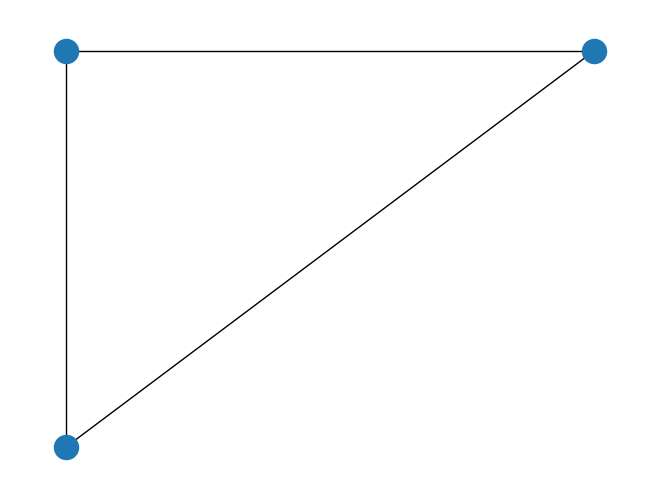

In [30]:
import networkx as nx
import matplotlib.pyplot as plt

G=nx.Graph()
G.add_node('nodeA')
G.add_node('nodeB')
G.add_node('nodeC')

G.add_edge('nodeA','nodeB')
G.add_edge('nodeA','nodeC')
G.add_edge('nodeB','nodeC')

pos={}
pos['nodeA']=(0,0)
pos['nodeB']=(1,1)
pos['nodeC']=(0,1)

nx.draw(G,pos)
plt.show()

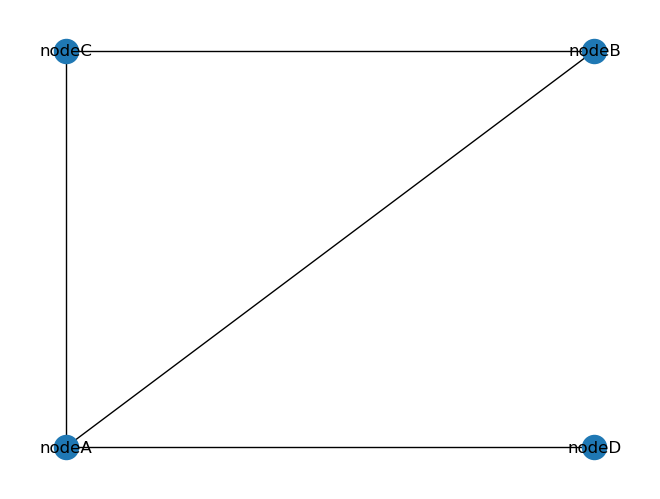

In [33]:
G.add_node('nodeD')
G.add_edge('nodeA','nodeD')
pos['nodeD']=(1,0)
nx.draw(G,pos,with_labels=True)

/var/folders/kk/xgndrsmj7cx4xqslp5sbbbp80000gn/T/ipykernel_10360/2842690383.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  edge_weights.append(df_w.iloc[i][j]*size)


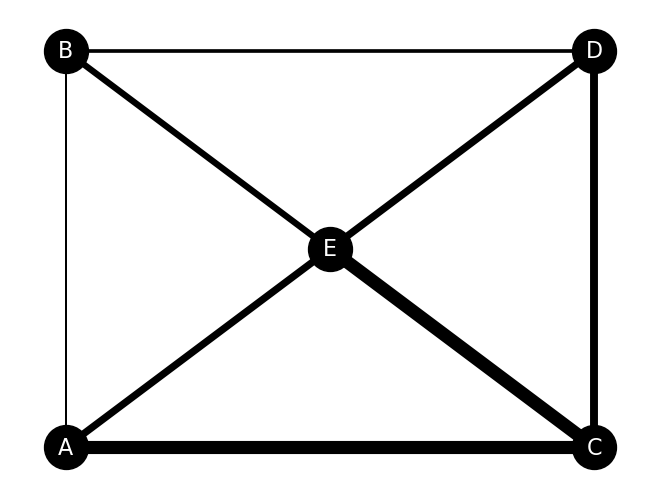

In [36]:
import numpy as np

df_w=pd.read_csv('network_weight.csv')
df_p=pd.read_csv('network_pos.csv')

G=nx.Graph()
for i in range(len(df_w.columns)):
    G.add_node(df_w.columns[i])

size = 10 
edge_weights=[]
for i in range(len(df_w.columns)):
    for j in range(len(df_w.columns)):
        if not i == j:
            G.add_edge(df_w.columns[i],df_w.columns[j])
            edge_weights.append(df_w.iloc[i][j]*size)

pos={}
for i in range(len(df_w.columns)):
    node=df_w.columns[i]
    pos[node]=(df_p[node][0],df_p[node][1])

nx.draw(G,pos,with_labels=True,font_size=16,node_size=1000,node_color='k',font_color='w',width=edge_weights)

plt.show()

In [38]:
df_tr=pd.read_csv('trans_route.csv',index_col='工場')
df_tr.head()

,F1,F2,F3,F4
工場,,,,
W1,15,15,0,5
W2,5,0,30,5
W3,10,15,2,15


In [41]:
df_pos=pd.read_csv('trans_route_pos.csv')
df_pos.head()

,W1,W2,W3,F1,F2,F3,F4
0,0,0,0,4.0,4.0,4.0,4.0
1,1,2,3,0.5,1.5,2.5,3.5


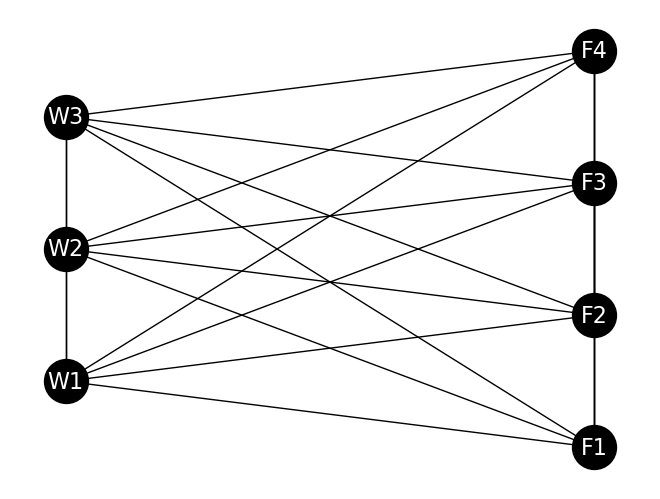

In [44]:
G=nx.Graph()

for i in range(len(df_pos.columns)):
    G.add_node(df_pos.columns[i])
num_pre=0
edge_weights=[]
size=0.1
for i in range(len(df_pos.columns)):
    for j in range(len(df_pos.columns)):
        if not (i==j):
            G.add_edge(df_pos.columns[i],df_pos.columns[j])
            if num_pre < len(G.edges):
                num_pre = len(G.edges)
                weights=0
                if (df_pos.columns[i] in df_tr.columns) and (df_pos.columns[j] in df_tr.index):
                    if df_tr[df_pos.columns[i]][df_pos.columns[j]]:
                        weight=df_tr[df_pos.columns[i]][df_pos.columns[j]]*size
                    elif (df_pos.columns[j] in df_tr.columns) and (df_pos.columns[i] in df_tr.index):
                        if df_tr[df_pos.columns[j]][df_pos.columns[i]]:
                            weight=df_tr[df_pos.columns[j]][df_pos.columns[i]]*size
                    edge_weights.append(weight)

pos={}
for i in range(len(df_pos.columns)):
    node=df_pos.columns[i]
    pos[node]=(df_pos[node][0],df_pos[node][1])

nx.draw(G,pos,with_labels=True,font_size=16,node_size=1000,node_color='k',font_color='w',width=edge_weights)
plt.show()

In [45]:
df_tr = pd.read_csv('trans_route.csv',index_col='工場')
df_tc = pd.read_csv('trans_cost.csv', index_col='工場')

def trans_cost(df_tr,df_tc):
    cost =0
    for i in range(len(df_tc.index)):
        for j in range(len(df_tr.columns)):
            cost += df_tr.iloc[i][j]*df_tc.iloc[i][j]
    return cost

print(trans_cost(df_tr,df_tc))

1493


/var/folders/kk/xgndrsmj7cx4xqslp5sbbbp80000gn/T/ipykernel_10360/3520503051.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cost += df_tr.iloc[i][j]*df_tc.iloc[i][j]


In [46]:
df_demand=pd.read_csv('demand.csv')
df_supply=pd.read_csv('supply.csv')
    

In [50]:
for i in range(len(df_demand.columns)):
    temp_sum=sum(df_tr[df_demand.columns[i]])
    print(str(df_demand.columns[i])+'への輸送量'+str(temp_sum)+'（需要量:'+str(df_demand.iloc[0][i])+')')
    if temp_sum >= df_demand.iloc[0][i]:
        print('OK')
    else:
        print('No')

for i in range(len(df_supply.columns)):
    temp_sum=sum(df_tr.loc[df_supply.columns[i]])
    print(str(df_supply.columns[i])+'からの輸送量'+str(temp_sum)+'（供給限界量:'+str(df_supply.iloc[0][i])+')')
    if temp_sum <= df_supply.iloc[0][i]:
        print('Ok')
    else:
        print('No')

F1への輸送量30（需要量:28)
OK
F2への輸送量30（需要量:29)
OK
F3への輸送量32（需要量:31)
OK
F4への輸送量25（需要量:25)
OK
W1からの輸送量35（供給限界量:35)
Ok
W2からの輸送量40（供給限界量:41)
Ok
W3からの輸送量42（供給限界量:42)
Ok


/var/folders/kk/xgndrsmj7cx4xqslp5sbbbp80000gn/T/ipykernel_10360/3989771163.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(str(df_demand.columns[i])+'への輸送量'+str(temp_sum)+'（需要量:'+str(df_demand.iloc[0][i])+')')
/var/folders/kk/xgndrsmj7cx4xqslp5sbbbp80000gn/T/ipykernel_10360/3989771163.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if temp_sum >= df_demand.iloc[0][i]:
/var/folders/kk/xgndrsmj7cx4xqslp5sbbbp80000gn/T/ipykernel_10360/3989771163.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent 

In [51]:
df_tr_new = pd.read_csv('trans_route_new.csv',index_col='工場')
print(df_tr_new)

    F1  F2  F3  F4
工場                
W1  15  15   0   0
W2   5   0  30  10
W3  10  15   2  15


In [52]:
trans_cost(df_tr_new,df_tc)

/var/folders/kk/xgndrsmj7cx4xqslp5sbbbp80000gn/T/ipykernel_10360/3520503051.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cost += df_tr.iloc[i][j]*df_tc.iloc[i][j]


1428

In [55]:
def condition_demand(df_tr,df_demand):
    flag = np.zeros(len(df_demand.columns))
    for i in range(len(df_demand.columns)):
        temp_sum=sum(df_tr[df_demand.columns[i]])
        if temp_sum >= df_demand.iloc[0][i]:
            flag[i]=1
    return flag

def condition_supply(df_tr, df_supply):
    flag = np.zeros(len(df_supply.columns))
    for i in range(len(df_supply.columns)):
        temp_sum=sum(df_tr.loc[df_supply.columns[i]])
        if temp_sum <= df_supply.iloc[0][i]:
            flag[i]=1
    return flag

print(condition_demand(df_tr_new,df_demand))
print(condition_supply(df_tr_new,df_supply))

[1. 1. 1. 1.]
[1. 0. 1.]


/var/folders/kk/xgndrsmj7cx4xqslp5sbbbp80000gn/T/ipykernel_10360/3881562076.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if temp_sum >= df_demand.iloc[0][i]:
/var/folders/kk/xgndrsmj7cx4xqslp5sbbbp80000gn/T/ipykernel_10360/3881562076.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if temp_sum <= df_supply.iloc[0][i]:
